In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [338]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Personal/asteroid_project/data/raw/meteorite_landings.csv')

In [339]:
df.head()

name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)

In [340]:
df.tail()

name     id nametype              recclass  mass (g)   fall  \
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
45711  1990.0  29.03700   17.01850       (29.037, 17.0185)  
45712  1999.0  13.78333    8.96667     (13.78333, 8.96667)  
45713  1939.0  49.25000   17.66667       (49.25, 17.66667)  
45714  2003.0  49.78917   41.50460     (49.78917, 41.5046)  
45715  1976.0  33.98333 -115.68333  (33.98333, -115.68333)

In [341]:
df.shape

(45716, 10)

In [342]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [344]:
df.describe().round(3)

id      mass (g)       year     reclat    reclong
count  45716.000  4.558500e+04  45425.000  38401.000  38401.000
mean   26889.735  1.327808e+04   1991.829    -39.123     61.074
std    16860.683  5.749889e+05     25.053     46.379     80.647
min        1.000  0.000000e+00    860.000    -87.367   -165.433
25%    12688.750  7.200000e+00   1987.000    -76.714      0.000
50%    24261.500  3.260000e+01   1998.000    -71.500     35.667
75%    40656.750  2.026000e+02   2003.000      0.000    157.167
max    57458.000  6.000000e+07   2101.000     81.167    354.473

In [345]:
df.loc[df['year'] > 2025]

name     id nametype recclass  mass (g)   fall  \
30682  Northwest Africa 7701  57150    Valid      CK6      55.0  Found   

         year  reclat  reclong GeoLocation  
30682  2101.0     0.0      0.0  (0.0, 0.0)

In [346]:
df.drop((df.loc[df['year'] > 2025]).index, inplace=True)

In [347]:
df.describe()

id      mass (g)          year        reclat       reclong
count  45715.000000  4.558400e+04  45424.000000  38400.000000  38400.000000
mean   26889.073171  1.327837e+04   1991.826413    -39.123599     61.075909
std    16860.273421  5.749952e+05     25.047805     46.378686     80.647746
min        1.000000  0.000000e+00    860.000000    -87.366670   -165.433330
25%    12688.500000  7.200000e+00   1987.000000    -76.714247      0.000000
50%    24261.000000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40655.500000  2.026225e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2013.000000     81.166670    354.473330

In [348]:
for col in df.select_dtypes(include='object').columns:
  if col not in ['name', 'recclass', 'GeoLocation']:
    print(f'{col}: {df[col].unique()}')

nametype: ['Valid' 'Relict']
fall: ['Fell' 'Found']


In [349]:
df.rename(columns={'mass (g)':'mass_g'}, inplace=True)

In [350]:
df.head()

name   id nametype     recclass    mass_g  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)

In [351]:
df.duplicated().sum()

np.int64(0)

In [352]:
df.duplicated(subset='name').sum()

np.int64(0)

In [353]:
df.shape

(45715, 10)

In [354]:
df.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass_g          131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [355]:
df['mass_g'] = df['mass_g'].fillna(0)

In [356]:
df.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass_g            0
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [357]:
print((df == 0).sum())

name              0
id                0
nametype          0
recclass          0
mass_g          150
fall              0
year              0
reclat         6437
reclong        6213
GeoLocation       0
dtype: int64


/tmp/ipython-input-1854994112.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




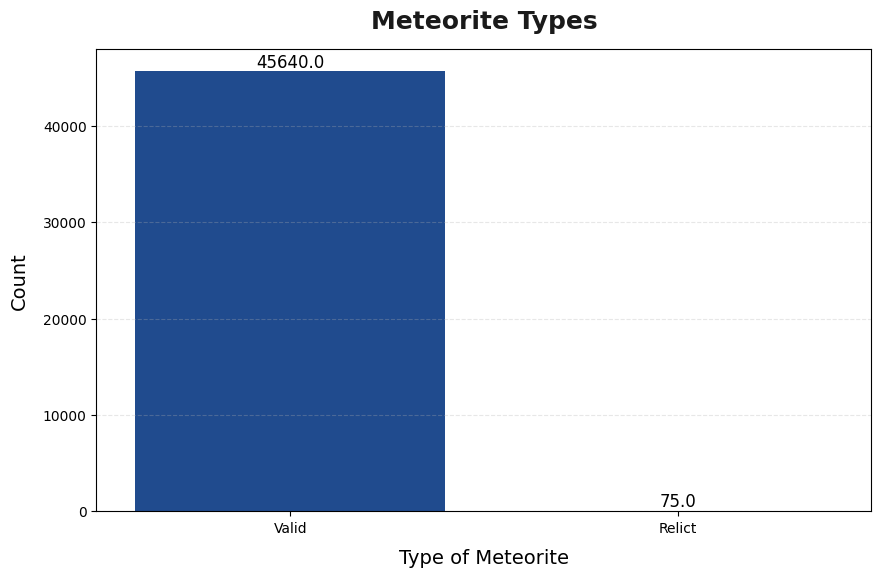

In [358]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x='nametype',
    palette=["#0D47A1", "#B71C1C"],
    order=df['nametype'].value_counts().index
)


plt.title(
    "Meteorite Types",
    fontsize=18,
    fontweight='bold',
    color="#1a1a1a",
    pad=15
)


plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xlabel("Type of Meteorite", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)


for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=12,
        color='black'
    )

plt.show()


In [359]:
df = df[~(df['nametype'] == 'Relict')]

In [360]:
df['nametype'].unique()

array(['Valid'], dtype=object)

/tmp/ipython-input-611021922.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




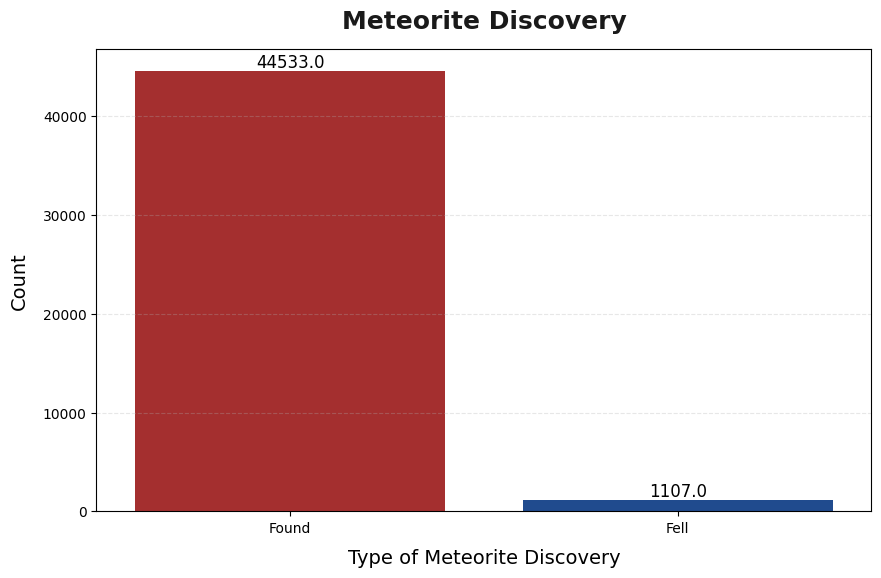

In [361]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x='fall',
    palette=["#B71C1C","#0D47A1"],
    order=df['fall'].value_counts().index
)


plt.title(
    "Meteorite Discovery",
    fontsize=18,
    fontweight='bold',
    color="#1a1a1a",
    pad=15
)


plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xlabel("Type of Meteorite Discovery", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)


for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=12,
        color='black'
    )

plt.show()


In [362]:
fig = px.density_map(df.loc[df['fall']=='Fell'],
                     lat='reclat',
                     lon='reclong',
                     radius=5,
                     color_continuous_scale="inferno",
                     center=dict(lat=34, lon=8), zoom=1,
                     map_style="open-street-map"
                     )


fig.update_traces(opacity=0.7)

fig.update_layout(
    title=dict(
        text="Heatmap of Meteorite Falls (Fall)",
        x=0.5,
        xanchor='center',
        font=dict(size=22, family="Arial, sans-serif", color="black")
    ),
    margin=dict(r=0, t=60, l=0, b=0),
)


fig.show()

In [363]:
fig = px.density_map(df.loc[df['fall']=='Found'],
                     lat='reclat',
                     lon='reclong',
                     radius=1,
                     center=dict(lat=34, lon=8), zoom=1,
                     color_continuous_scale="inferno",
                     map_style="open-street-map"
                     )


fig.update_traces(opacity=0.7)

fig.update_layout(
    title=dict(
        text="Heatmap of Meteorite Falls (Found)",
        x=0.5,
        xanchor='center',
        font=dict(size=22, family="Arial, sans-serif", color="black")
    ),
    margin=dict(r=0, t=60, l=0, b=0),
)


fig.show()

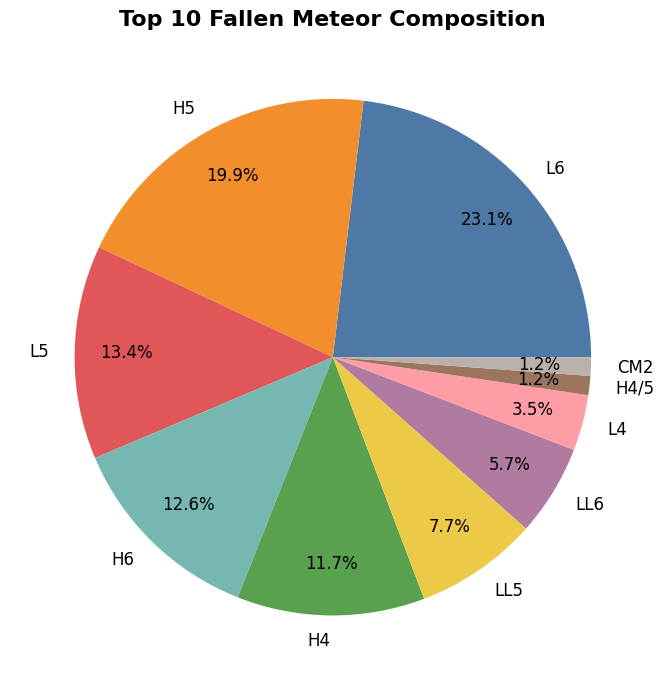

In [364]:
colors = [
    "#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F",
    "#EDC948", "#B07AA1", "#FF9DA7", "#9C755F", "#BAB0AC"
]


plt.figure(figsize=(10,7))
df['recclass'].value_counts()\
                   .head(10)\
                   .plot(kind='pie',
                         autopct='%1.1f%%',
                         colors=colors,
                         pctdistance=0.8,
                         textprops={'fontsize': 12},
                         )

plt.title("Top 10 Fallen Meteor Composition", fontsize=16, weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

In [365]:
fig = px.scatter_geo(df,
                     lat='reclat',
                     lon='reclong',
                     color='recclass',
                     hover_name="name",
                     size="mass_g",
                     projection="natural earth"
                     )


fig.update_traces(opacity=0.7)

fig.update_layout(
    title=dict(
        text="Map of Meteorite Landings Based on Their Mass & Composition",
        x=0.5,
        xanchor='center',
        font=dict(size=22, family="Arial, sans-serif", color="black")
    ),
    margin=dict(r=0, t=60, l=0, b=0),
)


fig.show()

/tmp/ipython-input-964843976.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-964843976.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




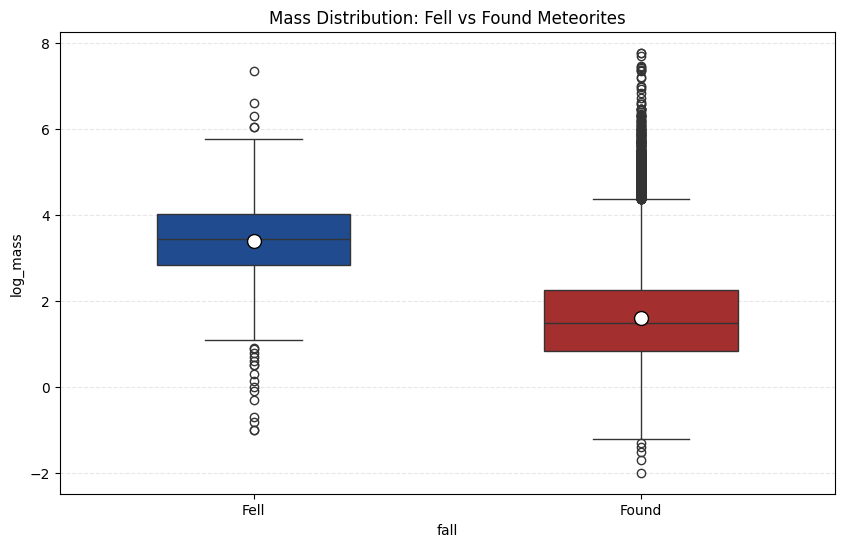

In [366]:
df_plot = df.loc[df['mass_g'] != 0]
df_plot['log_mass'] = np.log10(df_plot['mass_g'])

plt.figure(figsize=(10,6))
sns.boxplot(data=df_plot,
            x='fall',
            y='log_mass',
            palette=["#0D47A1", "#B71C1C"],
            width=0.5,
            showmeans=True,
            meanprops={
                        "marker": "o",
                        "markerfacecolor": "white",
                        "markeredgecolor": "black",
                        "markersize": 10
                       }
            )

plt.title("Mass Distribution: Fell vs Found Meteorites")
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

In [367]:
df.sort_values(by='mass_g', ascending=False).head(1)

name     id nametype   recclass      mass_g   fall    year    reclat  \
16392  Hoba  11890    Valid  Iron, IVB  60000000.0  Found  1920.0 -19.58333   

        reclong            GeoLocation  
16392  17.91667  (-19.58333, 17.91667)

In [368]:
lat = df.sort_values(by='mass_g', ascending=False).head(1)['reclat']
lon = df.sort_values(by='mass_g', ascending=False).head(1)['reclong']

px.scatter_map(df,
               lat=lat,
               lon=lon,

               zoom=1
               )

fig.update_layout(title='The Location of The Largest Meterorite By Mass')

fig.show()

In [369]:
df.loc[df['mass_g'] != 0].sort_values(by='mass_g').head(1)

name     id nametype recclass  mass_g   fall    year  reclat  \
42703  Yamato 8333  29438    Valid       H5    0.01  Found  1983.0   -71.5   

        reclong        GeoLocation  
42703  35.66667  (-71.5, 35.66667)

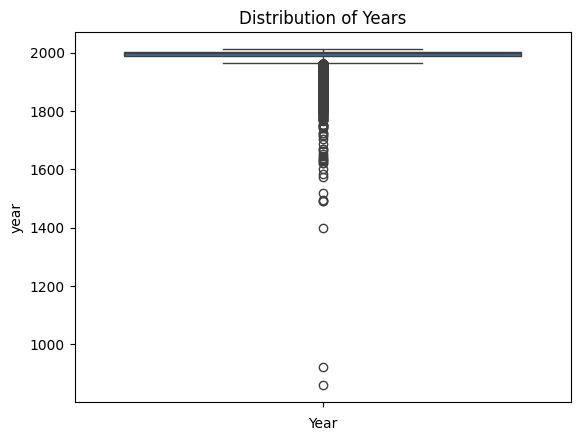

In [370]:
sns.boxplot(df['year'])
plt.xlabel('Year')
plt.title('Distribution of Years')
plt.show()

In [371]:
df.drop(['id', 'GeoLocation'], axis=1, inplace=True)

In [372]:
df.loc[(df['reclat']==0) & (df['reclong']==0)]

name nametype   recclass  mass_g   fall    year  \
37     Northwest Africa 5815    Valid         L5  256.80  Found     NaN   
597              Mason Gully    Valid         H5   24.54   Fell  2010.0   
1655       Allan Hills 09004    Valid  Howardite  221.70  Found  2009.0   
1656       Allan Hills 09005    Valid         L5  122.30  Found  2009.0   
1657       Allan Hills 09006    Valid         H5  104.30  Found  2009.0   
...                      ...      ...        ...     ...    ...     ...   
45655          Yamato 984144    Valid         H6   37.44  Found  1998.0   
45656          Yamato 984145    Valid         L6   54.80  Found  1998.0   
45657          Yamato 984146    Valid         H3   19.32  Found  1998.0   
45658          Yamato 984147    Valid        LL6  118.90  Found  1998.0   
45659          Yamato 984148    Valid         L5    4.59  Found  1998.0   

       reclat  reclong  
37        0.0      0.0  
597       0.0      0.0  
1655      0.0      0.0  
1656      0.0      0.0  
1657      0.0      0.0  
...       ...      ...  
45655     0.0      0.0  
45656     0.0      0.0  
45657     0.0      0.0  
45658     0.0      0.0  
45659     0.0      0.0  

[6213 rows x 8 columns]